<a href="https://colab.research.google.com/github/Jordan-Ireland/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [X] Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

##Assignment

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [32]:
df.head()
# df.describe()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.bathrooms.value_counts()
df.query('bathrooms > 5')

In [0]:
df.bedrooms.value_counts()
df.query('bedrooms > 6')

In [0]:
df.price.value_counts()
df.query('price > 1000000')

10 bathrooms but only 2 rooms?? Probably a mistake and meant 1, but have to remove it.

TODO: Remove bathrooms > 6, remove bedrooms > 6, remove prices > 50,000 since there are too few to get accurate representation with

In [0]:
df = df[(df['bathrooms'] < 5) & (df['price'] < 1000000) & (df['bedrooms'] > 0) & (df['bedrooms'] <= 6) & (df['bathrooms'] > 0) & (df['price'] <= 50000)]

In [12]:
df.shape

(39677, 34)

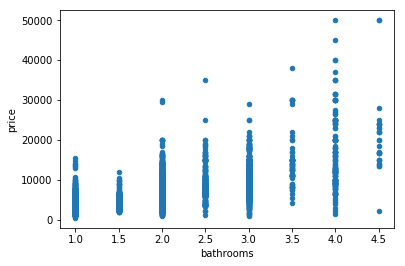

In [13]:
import plotly
import matplotlib.pyplot as plt

df.plot.scatter('bathrooms', 'price');

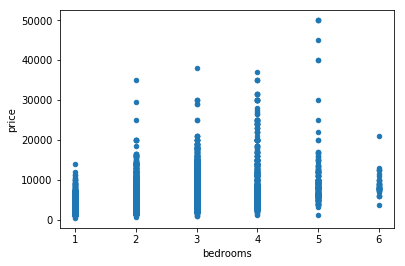

In [14]:
df.plot.scatter('bedrooms', 'price');

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

In [0]:
#import sklearn model
from sklearn.linear_model import LinearRegression

#choose model
model = LinearRegression()

# choose features and targets
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

#fit to model
model.fit(X,y)

#predict
y_pred = model.predict(X)

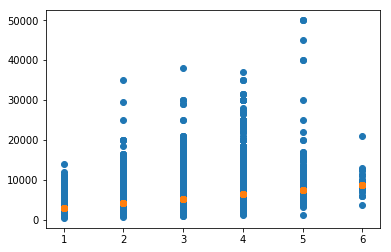

In [17]:
plt.scatter(X, y)
plt.scatter(X, y_pred);

In [18]:
model.coef_[0]
##Price increase per bedroom??

1139.1799279201955

In [19]:
model.intercept_
##price ??

1749.0461328036758

In [0]:
def predict_bedrooms(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]

  result = f'${estimate:,.0f} estimated price for {bedrooms:,.0f} bedroom apt'
  explanation = f' Each additional bedroom adds about ${coefficient:,.0f} increase in this model.'
  return result + explanation

  ##good to know about f'' instead of .format

In [23]:
predict_bedrooms(7)

'$9,723 estimated price for 7 bedroom apt Each additional bedroom adds about $1,139 increase in this model.'

In [28]:
from ipywidgets import interact

# interact??
interact(predict_bedrooms, bedrooms=(1, 10), step=1);

interactive(children=(IntSlider(value=5, description='bedrooms', max=10, min=1), Output()), _dom_classes=('wid…

###Clean Code

In [41]:
##import what we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ipywidgets import interact

#import data
pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

#Get rid of any outliers or dirtiness for cleaner results
mask = ((df['bathrooms'] < 5) &
        (df['price'] < 1000000) &
        (df['bedrooms'] > 0) &
        (df['bedrooms'] <= 6) &
        (df['bathrooms'] > 0) &
        (df['price'] <= 50000))
df = df[mask]

#choose model
model = LinearRegression()

# choose features and targets
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

#fit to model
model.fit(X,y)

#predict w/ function
def predict_bedrooms(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]

  result = f'${estimate:,.0f} estimated price for {bedrooms:,.0f} bedroom apt'
  explanation = f' Each additional bedroom adds about ${coefficient:,.0f} increase in this model.'
  return result + explanation


interact(predict_bedrooms, bedrooms=(1, 10), step=1);

interactive(children=(IntSlider(value=5, description='bedrooms', max=10, min=1), Output()), _dom_classes=('wid…

##Stretch Goals

- [X] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [42]:
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [45]:
df.interest_level.isnull().sum()

0

In [68]:
from ipywidgets import interactive

#import data
pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

#Get rid of any outliers or dirtiness for cleaner results
mask = ((df['bathrooms'] < 5) &
        (df['price'] < 1000000) &
        (df['bedrooms'] > 0) &
        (df['bedrooms'] <= 6) &
        (df['bathrooms'] > 0) &
        (df['price'] <= 50000))
df = df[mask]

#change from low medium high to 1,2,3
levels = {'low':1,'medium':2,'high':3}
df.interest_level = df.interest_level.map(levels)

#choose model
stretch_model = LinearRegression()

# choose features and targets
features = ['bedrooms','bathrooms','interest_level','elevator','dishwasher']
target = 'price'
X = df[features]
y = df[target]

#fit to model
stretch_model.fit(X,y)

#predict w/ function
def predict_all(bedrooms, bathrooms, interest=1, elevator=0, dishwasher=0):
  y_pred = stretch_model.predict([[bedrooms,bathrooms,interest,elevator,dishwasher]])
  estimate = y_pred[0]
  coefficient = stretch_model.coef_[0]
  result = f'${estimate:,.0f} estimated price for {bedrooms:.0f} bed/ {bathrooms:.0f} bath apartment'
  print('\n',result)

print('Welcome to the Ireland NYC Apt rental estimator!\n')
inputs = interactive(predict_all, bedrooms=(1, 10), bathrooms=(1,10), interest=[1,2,3], elevator=[True,False], dishwasher=[True,False]);

display(inputs)

Welcome to the Ireland NYC Apt rental estimator!



interactive(children=(IntSlider(value=5, description='bedrooms', max=10, min=1), IntSlider(value=5, descriptio…